In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

sns.set_context('notebook')
sns.set_style('white')

# Load training data

In [6]:
root = '/Users/primdal/lustre/pulling/predict_bipy/'
model_root = root + 'models/'
csv_path = model_root + 'step-G-performance-seed-2.csv'
df = pd.read_csv(csv_path)
df.sort_values(by='holdout_loss', inplace=True)
df['rank'] = range(len(df))

IOError: File /Users/primdal/lustre/pulling/predict_bipy/models/step-G-performance-seed-2.csv does not exist

In [3]:
df.head()

,basename,best_epoch,best_val_acc,best_val_loss,extra_dense,holdout_acc,holdout_loss,lower_cutoff,n_nodes,network,upper_cutoff,rank
17,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,95,1.000000,0.100242,extra_dense_False,0.9,0.252014,lower_cutoff_1e-07,n_nodes_6,recurrent_unit_lstm,upper_cutoff_0.1,0
29,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,53,0.900000,0.241516,extra_dense_True,0.9,0.274416,lower_cutoff_1e-07,n_nodes_6,recurrent_unit_lstm,upper_cutoff_0.1,1
1,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,97,0.933333,0.168251,extra_dense_True,0.9,0.289150,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,upper_cutoff_0.1,2
15,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,59,0.966667,0.197429,extra_dense_False,0.9,0.305336,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,upper_cutoff_0.1,3
5,recurrent_unit_lstm__n_nodes_10__extra_dense_T...,81,0.966667,0.158691,extra_dense_True,0.9,0.329858,lower_cutoff_1e-07,n_nodes_10,recurrent_unit_lstm,upper_cutoff_0.1,4


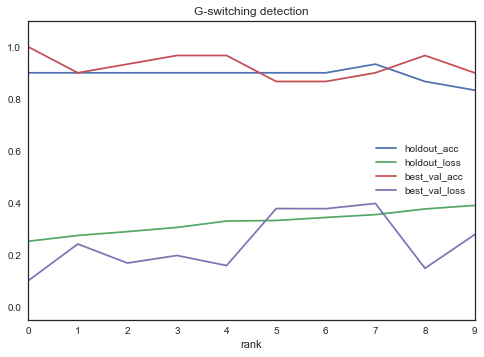

In [12]:
df[df['rank'] < 10].plot(x='rank',y=['holdout_acc', 'holdout_loss', 'best_val_acc', 'best_val_loss'])
plt.title('G-switching detection')
plt.ylim([-0.05,1.1])
plt.savefig('../reports/figures/step-G-models-rank.png')

# Load data with other seed

In [5]:
csv_path = model_root + 'step-G-seed-2-performance.csv'
df_verify = pd.read_csv(csv_path)
df_verify.sort_values(by='holdout_loss', inplace=True)
df_verify['rank'] = range(len(df_verify))

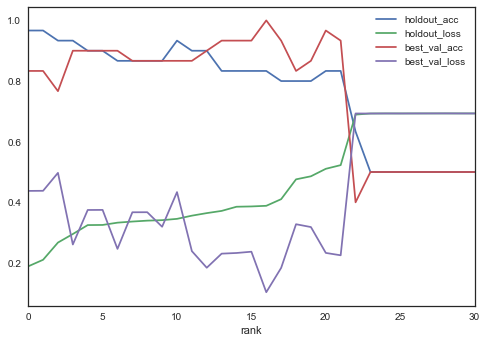

In [6]:
df_verify.plot(x='rank',y=['holdout_acc', 'holdout_loss', 'best_val_acc', 'best_val_loss'])

# Combine results

In [ ]:
assert len(df) == len(df_verify)

In [ ]:
set(df.basename.values) - set(df_verify.basename.values)

In [ ]:
df_combined = df[['basename']].copy()

In [ ]:
df.sort_values(by='basename', inplace=True)
df_verify.sort_values(by='basename', inplace=True)
for col in ['best_val_acc', 'best_val_loss', 'holdout_acc', 'holdout_loss']:
    ave = (df[col].values + df_verify[col].values)/2
    df_combined.loc[:,col] = ave

In [ ]:
df_combined.sort_values(by='holdout_loss', inplace=True)
df_combined['rank'] = range(len(df_combined))

# Top 1

In [ ]:
df.loc[df.holdout_loss.idxmin(),'basename']

# Top 10

In [ ]:
df_top10 = df_combined[df_combined['rank'] < 10]